In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
print(min(len(w) for w in words))
print(max(len(w) for w in words))

2
15


In [3]:
b = {}
for w in words:
    w = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(w, w[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [4]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [14]:
import torch
N = torch.zeros((28, 28), dtype=torch.int32) # 26 alphabets + start  + end tokens
# Need digits , alphabet mapping
aphabets = sorted(list(set("".join(words))))
stoi = {s:i for i,s in enumerate(aphabets)}
stoi['<S>'] = 26
stoi['<E>'] = 27

for w in words:
    w = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 


In [ ]:
itos = {i:s for s,i in enumerate(stoi)}

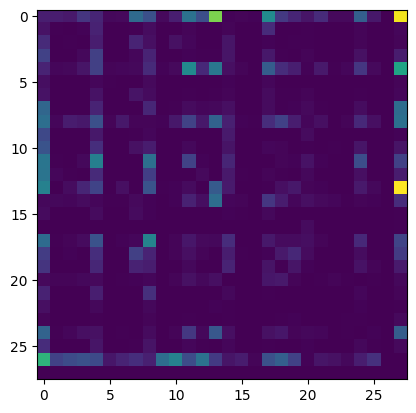

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [18]:
## Corrected version
import torch
N = torch.zeros((27, 27), dtype=torch.int32) # 26 alphabets + start  + end tokens
# Need digits , alphabet mapping
aphabets = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(aphabets)} # a starting from 1
stoi['.'] = 0
itos = {v:k for k,v in stoi.items()}

for w in words:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 


In [35]:
N[0] # Need to convert this to probability
p = N[0].float() / N[0].sum()
p # Of a word to be first char!!!

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [28]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/ p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [29]:
# 20 times experiment happens : 3 outputs possible P(0) = 0.6064, P(1) = 0.3033, P(2) = 0.093
torch.multinomial(p,
                  num_samples=20,
                  replacement=True)

tensor([1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2])

In [51]:
### Next character prediction Problem Statement
p = N[0].float()
p = p/p.sum() # probab of a word to be first char!!!
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,
                  num_samples=1,
                  replacement=True,
                  generator=g,
                  ).item()
itos[ix]

'd'

In [25]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out = []
    ix=0
    while True:
        p = N[ix].float()
        p = p/p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        
        if ix == 0:
            break
        else:
            out.append(itos[ix])
    print("".join(out))

cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
ftlspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja


In [36]:
### Vector wise operations
### Vectorized normalisation of the rows, tensor broadcasting!!
P = (N+1).float() # Model smoothening by adding 1
P /= P.sum(1, keepdim=True) # 27 x 27 / 27 x 1(one) -> broadcastable | copies to make 27 x 27 -> elementwise division!!

g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out = []
    ix=0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        else:
            out.append(itos[ix])
    print("".join(out))

cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
ftlspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja


### Loss function!!

In [39]:
log_likelihood = 0

n=0
# for w in ["andrejq"]:
for w in words:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} | {-logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}') # Average negative log likelihood
# log likelihood : if probability 1 : error/ penalty : 0
# if probability -> 0 | error / penalty is very high!!!

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
nll/n=tensor(2.4544)


### Neural Network

#### Training data creation

In [45]:
xs, ys = [], []
for w in words[:1]:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs) # tensor vs Tensor
ys = torch.tensor(ys)

In [49]:
## Like a Bag of Words Neural Network
import torch.nn.functional as F

# vocabulary as input!!
x_enc = F.one_hot(xs, num_classes=27).float() # So that input to NN is float and not int32
W = torch.randn((27, 1)) # output = 1 node
x_enc @ W # (5, 27), (27, 1) -> (5, 1)
# x_enc.shape

tensor([[-0.1926],
        [ 0.5090],
        [ 0.7330],
        [ 0.7330],
        [-1.9461]])

In [51]:
# Input layer : 27 inputs
# Hiddenlayer : 27 nodes

W = torch.randn((27, 27)) # Hidden layer containing 27 nodes!!!
logits = x_enc @ W # (5, 27), (27, 27) -> (5, 27) | Negative and Positive Numbers -> Want a probability count matrix like earlier

## Softmax function!!! Outputs probability distribution across outputs
counts = logits.exp() # equivalient N
probs = counts / counts.sum(1, keepdim=True)
probs.shape # 27 outputs across each possible vocab word

torch.Size([5, 27])

### Optimising the NN

In [52]:
xs

tensor([ 0,  5, 13, 13,  1])

In [53]:
ys

tensor([ 5, 13, 13,  1,  0])

In [106]:
xs, ys = [], []
for w in words:
    w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs) # tensor vs Tensor
ys = torch.tensor(ys)
num = xs.nelement()
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [107]:
# Number of iterations
epochs = 10
for k in range(epochs):
    # Forward pass
    x_enc = F.one_hot(xs, num_classes=27).float()
    logits = x_enc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()

    ## Backward pass
    W.grad = None
    loss.backward()
    W.data += -10 * W.grad

    print(loss.item())

3.758953332901001
3.6702592372894287
3.591153860092163
3.520017385482788
3.4557948112487793
3.397716522216797
3.345163583755493
3.2975902557373047
3.254483938217163
3.2153544425964355


In [95]:
print(loss.item())
# 3.7693049907684326
# 3.7672951221466064

3.7291626930236816


In [96]:
## Backward pass
W.grad = None
loss.backward()
W.data += -0.1 * W.grad

In [59]:
## Want to optimise these probabilities -> 1 
## during training by process of gradient descent optimisation!!!
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

One Hot Encoding really just selects a row of the next linear layer's weight matrix
Similar as N matrix ix row
Because One hot encoding everything else is 0
counts (in N) = log_counts().exp() (in W)

Smoothening out
p = (N+ 10000000).float() # Smoothening the probabilities
In GD, if W initialized to 0; probabilities -> 0 smooth; regularisation acts as a spring force trying to smoothen the function 
while optimising overall fucntion 